# Linear Regression

## Mariah Noelle Cornelio - 1002053287

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

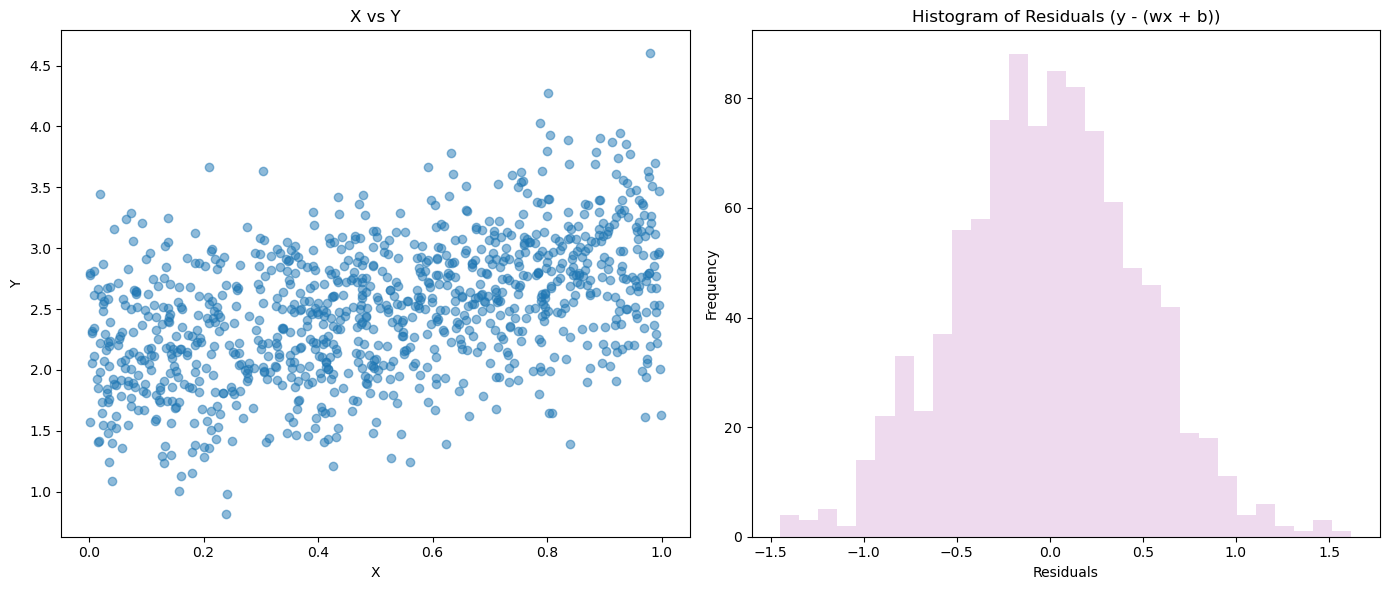

In [40]:
## Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
import math

## Create the dataset
n=1000
w=1
b=2
sigma=0.5
x=np.random.uniform(0,1,n)
y=w*x+b+np.random.normal(0,sigma,n)

## Plotting x vs y and the histogram of y - (wx + b)
residual=y-(w*x+b)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5)
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.hist(residual, bins=30, alpha=0.7, color="#e7cbe7")
plt.title("Histogram of Residuals (y - (wx + b))")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

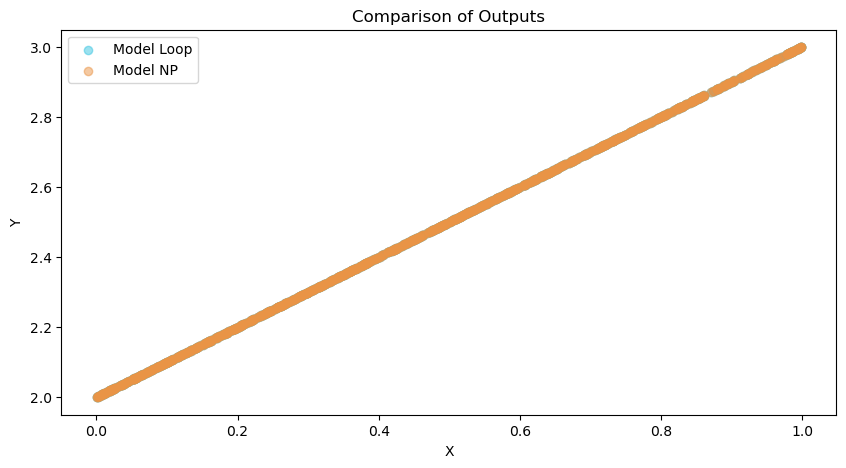

In [41]:
## Rewrite parameters
w=1
b=2
x=np.random.uniform(0,1,n)
n=1000

## Functions
def model_loop(x,w,b):
    y=[]
    for number in range(len(x)):
        y_formula=w*x[number]+b
        y.append(y_formula)
    return np.array(y)
    
def model_np(x,w,b):
    return w*x+b

## Outputs and Plotting the Outputs
model_loop_output=model_loop(x,w,b)
model_np_output=model_np(x,w,b)

plt.figure(figsize=(10, 5))
plt.scatter(x, model_loop_output, label="Model Loop", alpha=0.5, c="#39c5e1")
plt.scatter(x, model_np_output, label="Model NP", alpha=0.5, c="#ea9446")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comparison of Outputs")
plt.legend()

plt.show()

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

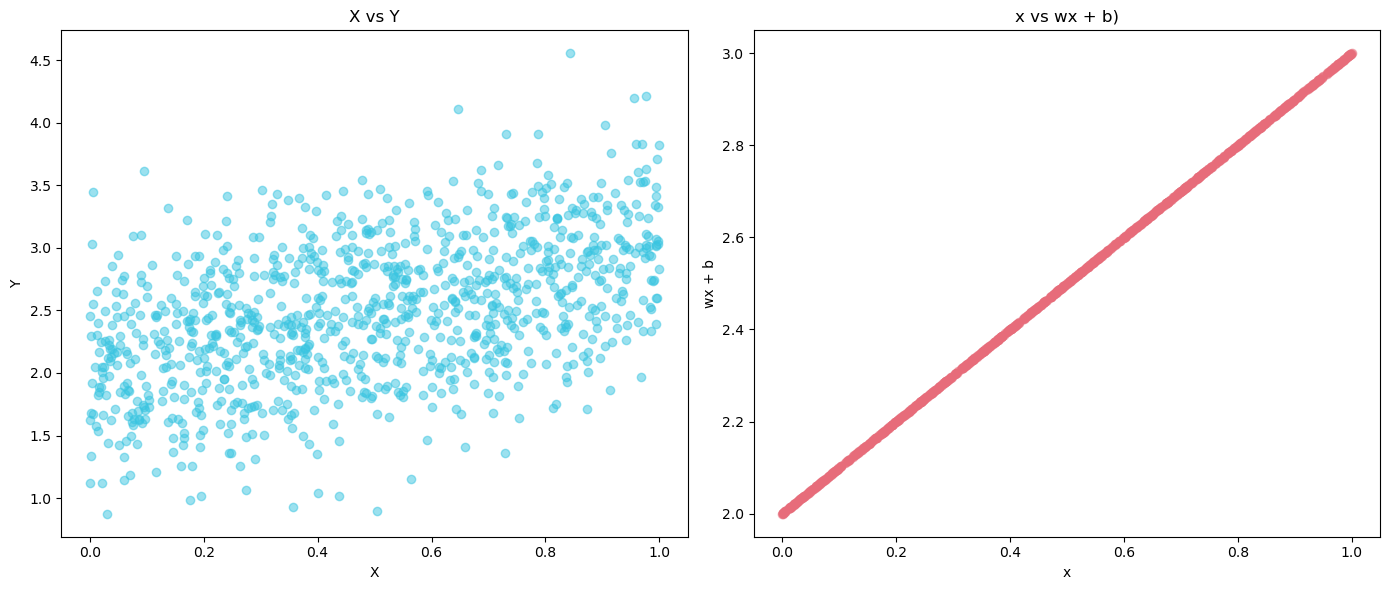

In [42]:
## Rewrite parameters (from exercise 1)
n=1000
w=1
b=2
sigma=0.5
x=np.random.uniform(0,1,n)
y=w*x+b+np.random.normal(0,sigma,n)


## Find wx+b using the function we created
wx_plus_b=model_np(x, w, b)

## Plot x vs y and x vs wx+b
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5, color="#39c5e1")
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.scatter(x, wx_plus_b, alpha=0.5, color="#e76c7a")
plt.title("x vs wx + b)")
plt.xlabel("x")
plt.ylabel("wx + b")

plt.tight_layout()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


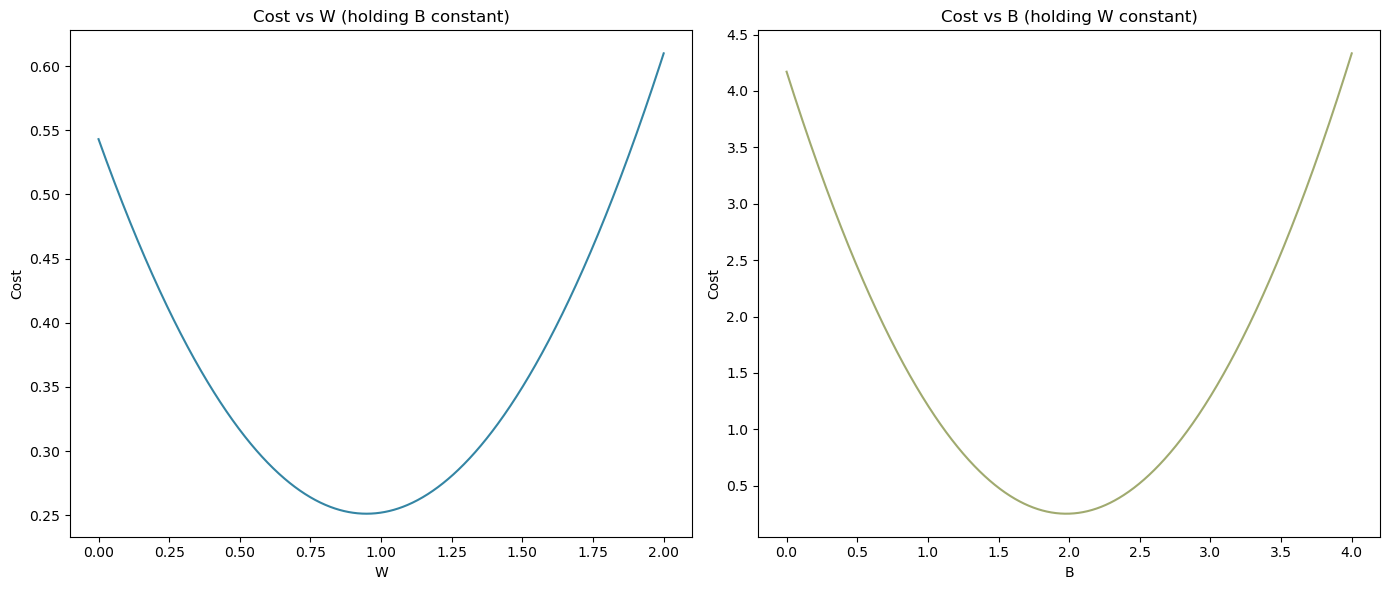

In [45]:
## MSE Formula 

# MSE = mean * error^2
# Where error is y-yhat and mean is the average of all data points

## Creating cost function
def cost(x,y,w,b):
    yhat=model_np(x,w,b)
    mse=np.mean((y-yhat)**2)
    return mse

#def cost(x, y, w, b): ------- This code adds the 1/2m for gradient stuff later on
    #data_points=len(x)
    #yhat=model_np(x, w, b)
    #mse=(1/(2*data_points))*np.sum((y-yhat)**2)
    #return mse

## Parameters
n=1000
w_constant=1
b_constant=2
sigma=0.5
x=np.random.uniform(0, 1, n)
y=model_np(x, w_constant, b_constant)+np.random.normal(0, sigma, n)
w_vals= np.linspace(0, 2, 1000)
b_vals= np.linspace(0, 4, 1000)

## Plotting the graphs
cost_vs_w=[cost(x, y, w, b_constant) for w in w_vals]
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(w_vals, cost_vs_w, color="#3485a4")
plt.title("Cost vs W (holding B constant)")
plt.xlabel("W")
plt.ylabel("Cost")

cost_vs_b=[cost(x, y, w_constant, b) for b in b_vals]
plt.subplot(1, 2, 2)
plt.plot(b_vals, cost_vs_b, color="#a0aa6f")
plt.title("Cost vs B (holding W constant)")
plt.xlabel("B")
plt.ylabel("Cost")
plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

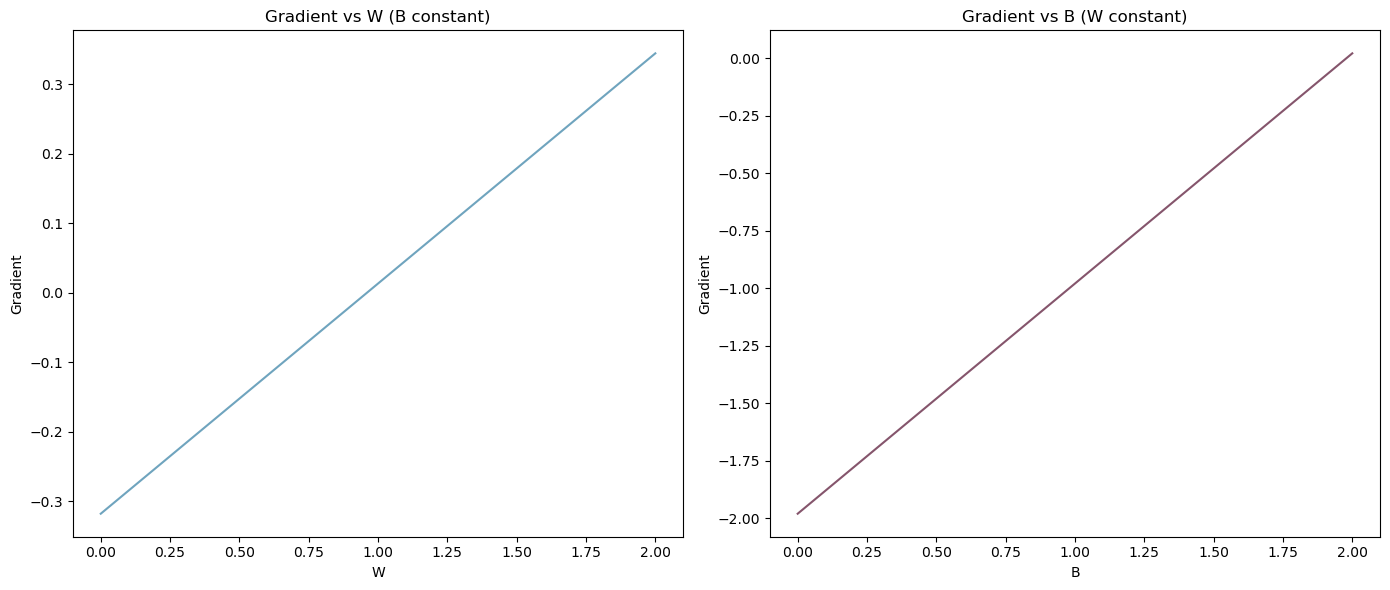

In [46]:
## What is the gradient of a function
# You find the gradient of a function with multiple variables by finding the partial derivative

## Creating the function
def gradient(x, y, w, b):
    yhat=model_np(x, w, b)
    data_points=len(x)
    dj_dw=-(1/data_points)*np.sum((y-yhat)*x) # In respect to w, the derivative is x
    dj_db=-(1/data_points)*np.sum(y-yhat) # In respect to b, the derivative is 1, negative direction to minimize
    return dj_dw, dj_db

## Parameters
n=1000
w_constant=1
b_constant=2
sigma=0.5
x=np.random.uniform(0, 1, n)
y=model_np(x, w_constant, b_constant)+np.random.normal(0, sigma, n)
w_vals=np.linspace(0, 2, 1000)
b_vals=np.linspace(0, 2, 1000)

## Computing the gradients
gradients_w=np.zeros_like(w_vals)
for i, w in enumerate(w_vals):
    dj_dw=gradient(x, y, w, b_constant)[0]
    gradients_w[i]=dj_dw

gradients_b=np.zeros_like(b_vals)
for i, b in enumerate(b_vals):
    dj_db=gradient(x, y, w_constant, b)[1]
    gradients_b[i]=dj_db

## Plotting the graphs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(w_vals, gradients_w, color="#6fa4be")
plt.title("Gradient vs W (B constant)")
plt.xlabel("W")
plt.ylabel("Gradient")

plt.subplot(1, 2, 2)
plt.plot(b_vals, gradients_b, color="#85556c")
plt.title("Gradient vs B (W constant)")
plt.xlabel("B")
plt.ylabel("Gradient")

plt.tight_layout()
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [47]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 5.42e-01  dj_dw: -1.342e+00, dj_db: -2.501e+00   w:  6.711e-01, b: 1.25031e+00
Iteration  100: Cost 1.21e-01  dj_dw:  1.627e-04, dj_db: -8.776e-05   w:  9.896e-01, b: 2.00244e+00
Iteration  200: Cost 1.21e-01  dj_dw:  5.500e-06, dj_db: -2.966e-06   w:  9.873e-01, b: 2.00367e+00
Iteration  300: Cost 1.21e-01  dj_dw:  1.859e-07, dj_db: -1.002e-07   w:  9.872e-01, b: 2.00371e+00
Iteration  400: Cost 1.21e-01  dj_dw:  6.282e-09, dj_db: -3.388e-09   w:  9.872e-01, b: 2.00371e+00
Iteration  500: Cost 1.21e-01  dj_dw:  2.123e-10, dj_db: -1.145e-10   w:  9.872e-01, b: 2.00371e+00
Iteration  600: Cost 1.21e-01  dj_dw:  7.176e-12, dj_db: -3.870e-12   w:  9.872e-01, b: 2.00371e+00
Iteration  700: Cost 1.21e-01  dj_dw:  2.425e-13, dj_db: -1.307e-13   w:  9.872e-01, b: 2.00371e+00
Iteration  800: Cost 1.21e-01  dj_dw:  8.087e-15, dj_db: -4.720e-15   w:  9.872e-01, b: 2.00371e+00
Iteration  900: Cost 1.21e-01  dj_dw:  3.428e-16, dj_db: -1.066e-16   w:  9.872e-01, b: 2.00371e+00


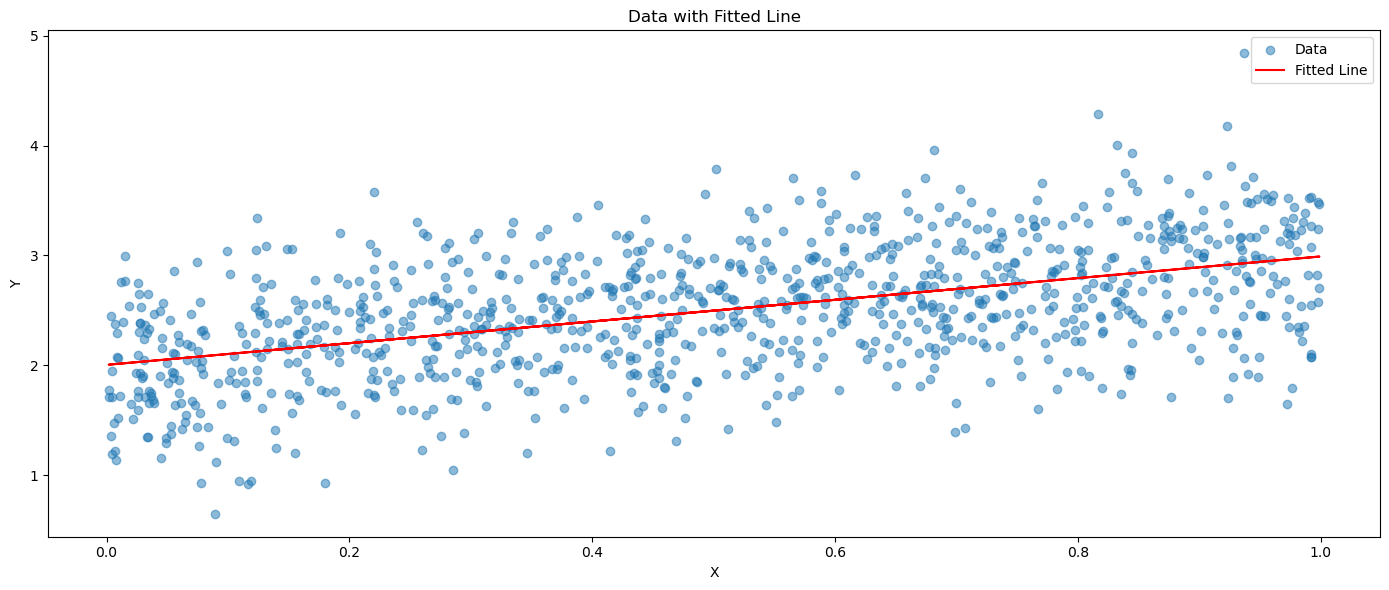

In [48]:
## Redefining cost function to fit gradient - adding the 1/2m
def cost(x, y, w, b):
    data_points=len(x)
    yhat=model_np(x, w, b)
    mse=(1/(2*data_points))*np.sum((y-yhat)**2)
    return mse
    
## Parameters
n=1000
w_constant=1
b_constant=2
sigma=0.5
x=np.random.uniform(0, 1, n)
y=model_np(x, w_constant, b_constant)+np.random.normal(0, sigma, n)

w_in=0
b_in=0
alpha=0.5 # Alpha is the learning rate, play around with this
num_iters=1000

# Find gradient descents
w_final, b_final, J_history, p_history=gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)

# Plotting the fitted line
plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
plt.scatter(x, y, alpha=0.5, label="Data")
plt.plot(x, model_np(x, w_final, b_final), color="red", label="Fitted Line")
plt.title("Data with Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()


7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 3.16e+00  dj_dw: -1.260e+00, dj_db: -2.473e+00   w:  1.260e-02, b: 2.47311e-02
Iteration  100: Cost 3.85e-01  dj_dw: -3.626e-01, dj_db: -7.077e-01   w:  7.285e-01, b: 1.42702e+00
Iteration  200: Cost 1.58e-01  dj_dw: -1.054e-01, dj_db: -2.020e-01   w:  9.351e-01, b: 1.82798e+00
Iteration  300: Cost 1.39e-01  dj_dw: -3.156e-02, dj_db: -5.716e-02   w:  9.957e-01, b: 1.94212e+00
Iteration  400: Cost 1.37e-01  dj_dw: -1.034e-02, dj_db: -1.572e-02   w:  1.014e+00, b: 1.97414e+00
Iteration  500: Cost 1.37e-01  dj_dw: -4.179e-03, dj_db: -3.884e-03   w:  1.021e+00, b: 1.98267e+00
Iteration  600: Cost 1.37e-01  dj_dw: -2.341e-03, dj_db: -5.310e-04   w:  1.024e+00, b: 1.98452e+00
Iteration  700: Cost 1.37e-01  dj_dw: -1.745e-03, dj_db:  3.941e-04   w:  1.026e+00, b: 1.98448e+00
Iteration  800: Cost 1.37e-01  dj_dw: -1.509e-03, dj_db:  6.260e-04   w:  1.028e+00, b: 1.98394e+00
Iteration  900: Cost 1.37e-01  dj_dw: -1.380e-03, dj_db:  6.613e-04   w:  1.029e+00, b: 1.98329e+00


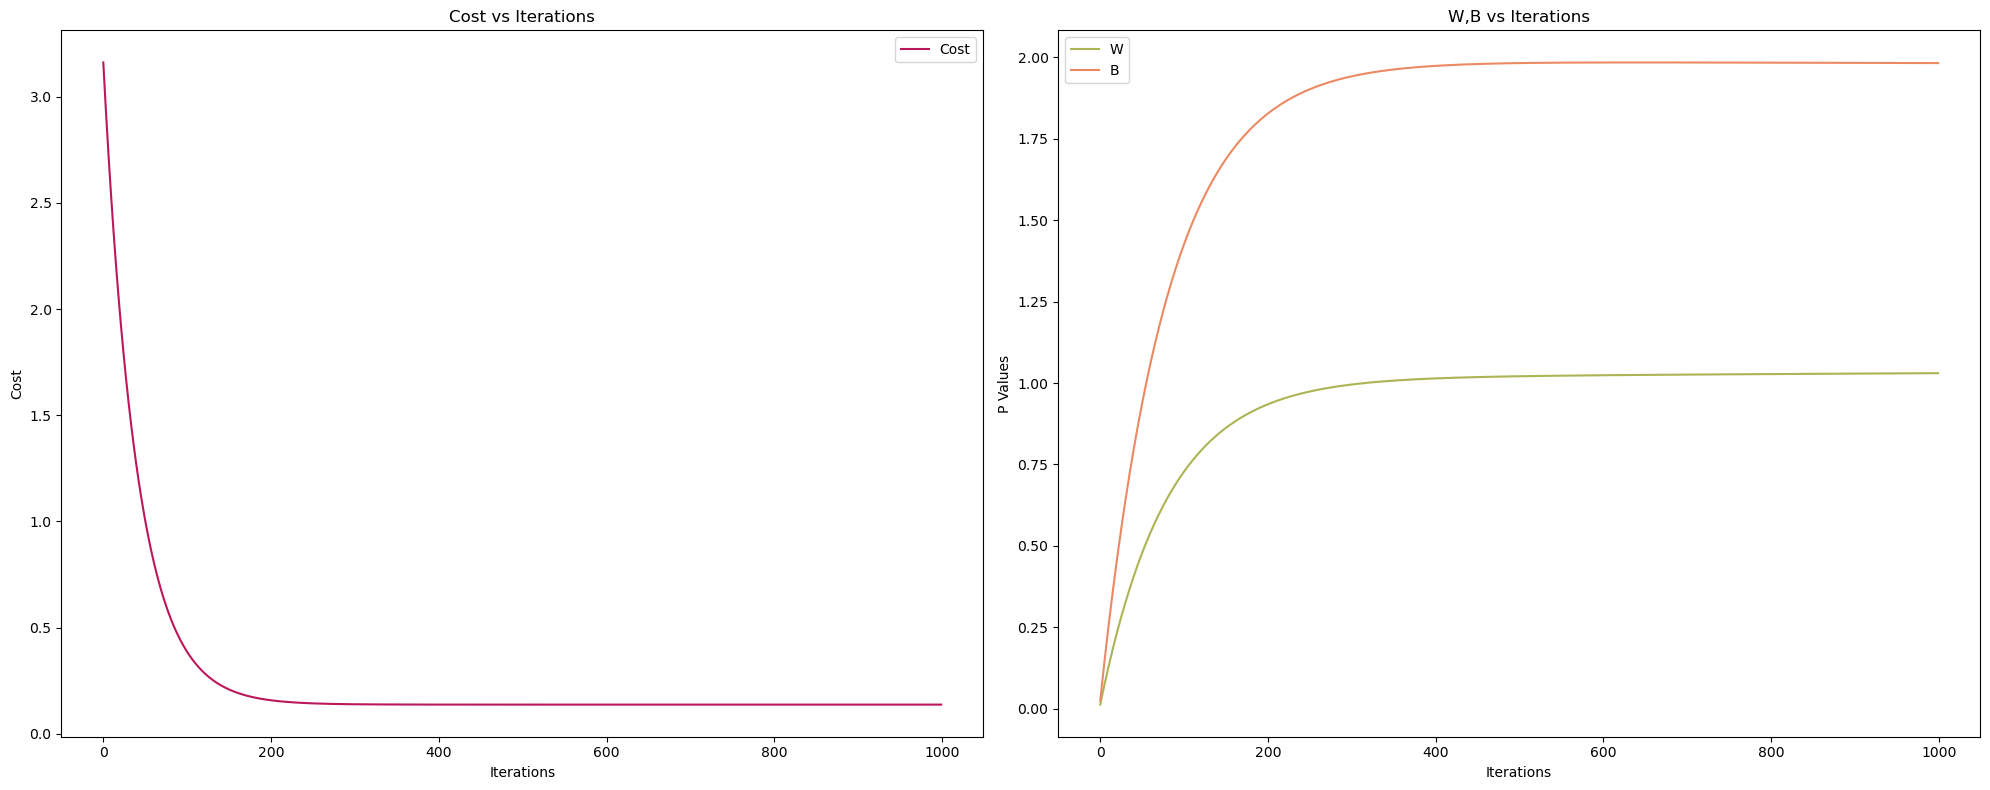

In [61]:
## Parameters
n=1000
w_constant=1
b_constant=2
sigma=0.5
x=np.random.uniform(0, 1, n)
y=model_np(x, w_constant, b_constant)+np.random.normal(0, sigma, n)

w_in=0
b_in=0
alpha=0.01 # alpha=0.5 looks weird
num_iters=1000

## Finding gradient descents and history for w and b
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)
w_hist=[p[0] for p in p_hist]
b_hist=[p[1] for p in p_hist]

## Plotting the graphs
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(J_hist, color="#bc175a", label="Cost")
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w_hist, label="W", color="#acb453")
plt.plot(b_hist, label="B", color="#eb8a62")
plt.title("W,B vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("P Values")
plt.legend()

plt.tight_layout()
plt.show()
